In [1]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import glob
import matplotlib.pyplot as plt
from collections import Counter

In [10]:
!pip install ipdb

You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [13]:
import ipdb

# Import History Data for analysis

In [3]:
cd /home/ec2-user/SageMaker/results/unet_250_samp_sz_augmntd_stndrd_21_10_19

/home/ec2-user/SageMaker/results/unet_250_samp_sz_augmntd_stndrd_21_10_19


In [4]:
final_list=[]
for root,subdir,files in os.walk(os.getcwd()):
    if len(files)>0:
        
        file_list=glob.glob(root+'/*history*')
        final_list=final_list+file_list
#Sorted to ensure history part 2,3 etc are synced together 
final_list=sorted(final_list)
final_list

['/home/ec2-user/SageMaker/results/unet_250_samp_sz_augmntd_stndrd_21_10_19/cat_cross_entropy_wghted/btch_sz_3/t1dual_inphase_all_orgs_grey_lvl_256_optm_adam_loss_cat_ce_loss_cls_wght_trn_samp_sz_250_btch_sz_3_lr_0.0003_time_2019-10-21_history',
 '/home/ec2-user/SageMaker/results/unet_250_samp_sz_augmntd_stndrd_21_10_19/cat_cross_entropy_wghted/btch_sz_3/t1dual_inphase_all_orgs_grey_lvl_256_optm_adam_loss_cat_ce_loss_cls_wght_trn_samp_sz_250_btch_sz_3_lr_0.001_time_2019-10-21_history',
 '/home/ec2-user/SageMaker/results/unet_250_samp_sz_augmntd_stndrd_21_10_19/cat_cross_entropy_wghted/btch_sz_3/t1dual_inphase_all_orgs_grey_lvl_256_optm_adam_loss_cat_ce_loss_cls_wght_trn_samp_sz_250_btch_sz_3_lr_0.01_time_2019-10-21_history',
 '/home/ec2-user/SageMaker/results/unet_250_samp_sz_augmntd_stndrd_21_10_19/cat_cross_entropy_wghted/btch_sz_3/t1dual_inphase_all_orgs_grey_lvl_256_optm_adam_loss_cat_ce_loss_cls_wght_trn_samp_sz_250_btch_sz_3_lr_0.1_time_2019-10-21_history',
 '/home/ec2-user/SageM

In [17]:
pickle_dictionary=[]
add_info=[('learn_rate',['0.0003','0.001','0.01','0.1']),
          ('samp_sz',['250']),('btch_sz',['3','5','7']),
          ('loss_type',['dice','focal','cat'])]

for file in final_list:
    
    if os.path.getsize(file) > 0:
        #print('file found:',file)
        with open(file, "rb") as f:
            unpickler = pickle.Unpickler(f)
            file_dict = unpickler.load()
        #Acquiring file information based on keys in add info from file string.  
        file_dict,split_vals=get_file_info(file,add_info)
            
        #finding if additional sequence values present
        seq_lst=[x for x in split_vals if x in ['pt2','pt3','pt4']]
        
        if len(seq_lst)>0:
            print('appended_values')
            
            #due to sorting of list if pt 2 is found it is found directly after the initial file hence this matching approach
            pickle_dictionary[len(pickle_dictionary)-1],tmp_chk=FullMergeDict(pickle_dictionary[len(pickle_dictionary)-1], 
                                                                              file_dict)
        else:
            #ipdb.set_trace()
            pickle_dictionary.append(file_dict)
    else:
        print('no values in data:',file)


    
    #print(file_dict['btch_sz'])
    #print(file_dict['learn_rate'])
    #print(file_dict['samp_sz'])
    #print(file_dict['loss'])
    

['/home/ec2-user/SageMaker/results/unet', '0.0003', '10', '19/cat', '2019-10-21', '21', '250', '250', '256', '3', '3/t1dual', 'adam', 'all', 'augmntd', 'btch', 'cat', 'ce', 'cls', 'cross', 'entropy', 'grey', 'history', 'inphase', 'loss', 'loss', 'lr', 'lvl', 'optm', 'orgs', 'samp', 'samp', 'stndrd', 'sz', 'sz', 'sz', 'sz', 'time', 'trn', 'wght', 'wghted/btch']
learn_rate
samp_sz
btch_sz
loss_type
['/home/ec2-user/SageMaker/results/unet', '0.001', '10', '19/cat', '2019-10-21', '21', '250', '250', '256', '3', '3/t1dual', 'adam', 'all', 'augmntd', 'btch', 'cat', 'ce', 'cls', 'cross', 'entropy', 'grey', 'history', 'inphase', 'loss', 'loss', 'lr', 'lvl', 'optm', 'orgs', 'samp', 'samp', 'stndrd', 'sz', 'sz', 'sz', 'sz', 'time', 'trn', 'wght', 'wghted/btch']
learn_rate
samp_sz
btch_sz
loss_type
['/home/ec2-user/SageMaker/results/unet', '0.01', '10', '19/cat', '2019-10-21', '21', '250', '250', '256', '3', '3/t1dual', 'adam', 'all', 'augmntd', 'btch', 'cat', 'ce', 'cls', 'cross', 'entropy', 'gr

In [18]:
len(pickle_dictionary)

20

In [19]:
def get_file_info(file,add_info):
    """The purpose of this method is to pull file information from the file name presnet in the string"""
    split_vals=file.split('_')
    split_vals.sort()
    print(split_vals)
    #Iterate through additional information of set of tuples on file strings for analysis
    for param_k,param_v in add_info:
        print(param_k)
        file_dict[param_k]=[x for x in param_v if x in split_vals][0]
    return file_dict,split_vals

In [20]:
def FullMergeDict(D1, D2):
    """The purpose of this method is to merge two dictoinaries irrespective of  variable types"""
    
    for key, value in D1.items():
        #ipdb.set_trace()
        if key in D2:
            if type(value) is dict:
                FullMergeDict(D1[key], D2[key])  
            else:
                if type(value) in (int, float, str):    
                    D1[key] = value
                if type(D2[key]) is list:
                    D1[key].extend(D2[key])
                #else:
                 #   D1[key].append(D2[key])
    for key, value in D2.items():
        
        if key not in D1:
            D1[key] = value
    
    return (D1,D2)

In [24]:
info.keys()

dict_keys(['val_loss', 'val_iou_score', 'val_f1-score', 'loss', 'iou_score', 'f1-score', 'lr', 'learn_rate', 'samp_sz', 'btch_sz', 'loss_type'])

# Plotting training and validation data for analysis

dice
dice
dice
dice
dice
dice


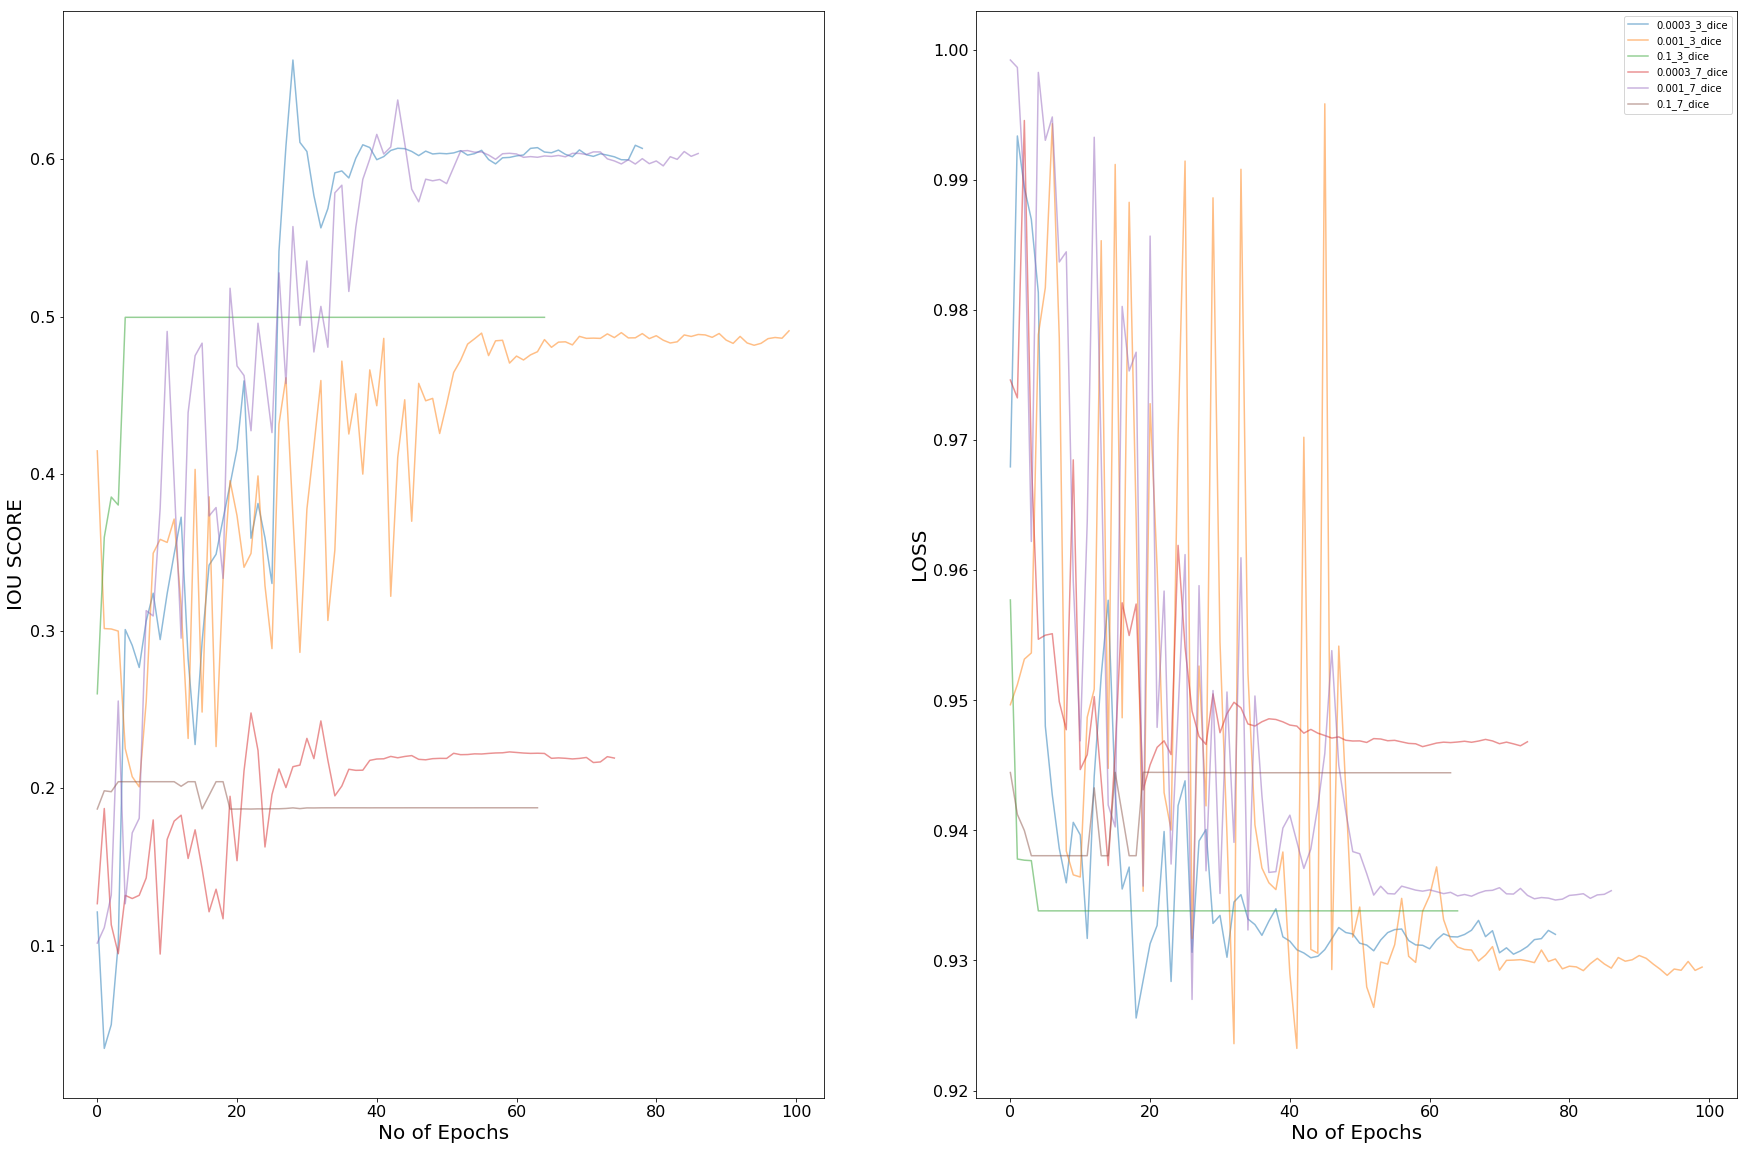

In [25]:
loss_type='dice'
fig,axes=plt.subplots(1,2,figsize=(30,20))
leg_nms=[]
for info in pickle_dictionary:
    if info['loss_type']==loss_type and info['learn_rate']!='0.01':
        print(info['loss_type'])
        #tmp dictionary values
        iou_info_val=[info['val_f1-score']]#,info['iou_score']
        loss_info_val=[info['val_loss']]#,info['loss']

        #print(val_iou)
        str_nm='_'.join([info['learn_rate'],info['btch_sz'],info['loss_type']])
        leg_nms.append(str_nm)

        [axes[0].plot(np.arange(len(i)),i,alpha=0.5) for i in iou_info_val]
        [axes[1].plot(np.arange(len(i)),i,alpha=0.5) for i in loss_info_val]
    
axes[0].set_ylabel('IOU SCORE',fontsize=20)
axes[1].set_ylabel('LOSS',fontsize=20)
[axes_val.set_xlabel('No of Epochs',fontsize=20) for axes_val in axes]
[axes_val.tick_params(axis='both', which='major', labelsize=16) for axes_val in axes]

plt.legend(leg_nms)

plt.show()

NameError: name 'history_reload' is not defined

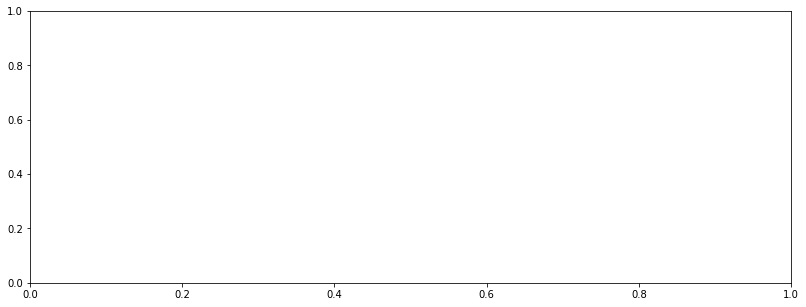

In [138]:

# Plot training & validation iou_score values
plt.figure(figsize=(30, 5))
plt.subplot(121)
plt.plot(history_reload.history['iou_score'])
plt.plot(history_reload.history['val_iou_score'])
plt.title('Model iou_score')
plt.ylabel('iou_score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(122)
plt.plot(history_reload.history['loss'])
plt.plot(history_reload.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])